# Train-the-Trainer Hands-on Workshop: Deep Learning Projektarbeit
Benjamin Bergner, Stefan Konigorski, Matthias Kirchler (Hasso Plattner Institut)
20. November 2020

Willkommen zur Projektarbeit mit Deep Learning in fast.ai

## Agenda

<a name="Agenda"></a>

| Inhalt | Zeit |
| :--- | :---: |
| Einführung | 10:00 - 10:15 |
| 1) Einführung in Machine Learning mit scikit-learn | 10:15 - 11:00|
|  a) Klassische Vorhersagemodelle | |
|  b) Unüberwachtes Lernen mit Clusteranalyse & PCA | |
| Übungen in scikit-learn in Kleingruppen | 11:00 - 11:30|
| Besprechung der Ergebnisse | 11:30 - 11:45|
| Pause | 11:45 - 12:15|
| 2) Einführung in Deep Learning mit fast.ai | 12:15 - 13:00|
| Projektarbeit in fast.ai - Kleingruppen | 13:00 - 13:30|
| Besprechung der Ergebnisse | 13:30 - 13:45|
| Abschluss | 13:45 - 14:00|

## Vorbemerkung
Bevor Sie mit der Ausführung beginnen, sollten Sie den Laufzeittyp ("runtime type", falls Ihre Sprache auf Englisch eingestellt ist) auf "GPU" ändern: 

1.

<img src="https://drive.google.com/uc?export=view&id=1uTzSVK4BCAUwxJ1a1b-mB86jwZ_cbFAR" width="400"/>


2.

<img src="https://drive.google.com/uc?export=view&id=11dDC7mx-MyoNIx0jyTiiT4RLtEPmi-aO" width="400"/>


Als nächstes müssen Sie die folgende Zeile ausführen um benötigte Software zu installieren.

Die Fehlermeldung `ERROR: fastai 2.0.6 has requirement fastcore>=1.0.0, but you'll have fastcore 0.1.38 which is incompatible.` können Sie ignorieren. Sollten andere Fehler auftreten, wenden Sie sich bitte an einen der Moderatoren.

In [1]:
# Diese Zeile muss am Anfang ein mal ausgeführt werden. Danach müssen Sie sie nicht mehr ausführen
! pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
! pip install fastai==2.0.6
! pip install fastcore==0.1.38

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 708.0MB 26kB/s 
     |████████████████████████████████| 5.9MB 60.6MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
     |████████████████████████████████| 358kB 11.1MB/s 
     |████████████████████████████████| 61kB 11.0MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
ERROR: fastai 2.0.6 has requirement fastcore>=1.0.0, but you'll have fastcore 0.1.38 which is incompatible.
  Found existing installation: fastcore 1.3.19
    Uninstalling fastcore-1.3.19:
      Successfully uninstalled fastcore-1.3.19


# Willkommen zur Deep Learning Übung mit `fast.ai`


In [2]:
# Diese Zeile muss nach jedem Neustart der Laufzeit neu gestartet werden!
import os
from os import path as osp
from fastai.vision.all import *
from torchvision import models

**Das Ziel dieser Übung ist es, einen (oder mehrere) der vorgeschlagenen Datensätze zu verwenden, und ein möglichst gutes Convolutional Neural Network darauf zu trainieren! Wir haben alles schon für Sie vorbereitet, so dass Sie nur die jeweiligen Parameter ändern müssen. In der Besprechung am Ende der Session werden dann die Ergebnisse verglichen.**

In diesem Notebook können Sie Ihre eigenen Netzwerke trainieren und herausfinden, welche Parameter das Training auf welche Weise beeinflussen. Zeilen, in denen Sie eine Entscheidung treffen müssen sind jeweils zu Beginn markiert mit dem Kommentar:

```python
# Hier sind Sie am Zug!
```
Auf die meisten dieser "Entscheidungszeilen" folgen dann ein oder mehrere andere Zeilen, die Sie einfach nur ausführen müssen, in denen aber nichts verändert werden muss. Diese Zeilen dürfen Sie natürlich auch verändern, aber dort sind sinnvolle Änderungen deutlich schwerer. Sollten Sie sich nicht sicher sein, lassen Sie diese Zeilen am besten unverändert.


**Bei vielen Problemen hilft es, die "Laufzeit" ("Runtime") neu zu starten. Das können Sie oben in der Leiste unter "Laufzeit" -> "Laufzeit neu starten" tun (bzw. "Runtime" -> "Restart runtime..."). Nach einem Neustart der Laufzeit müssen Sie immer die Zeile mit den `import` und `from ...` statements neu ausführen, und auch alle anderen vorher ausgeführten Befehle hat `Colab` dann wieder vergessen und müssen eventuell neu ausgeführt werden.**

**Auch wenn Sie einen `CUDA out of memory error` bekommen hilft es meist, die Laufzeit einfach neu zu starten. Falls das nicht ausreicht, müssen Sie die `batch_size` verkleinern und/oder die Netzwerkarchitektur (`model`) verkleinern.**

Beachten Sie auch, dass Sie pro Person maximal **ein** Notebook mit GPU parallel verwenden können. Da das Training teilweise einige Minuten dauern kann, können Sie in Ihrer Gruppe überlegen, ob zwei Teilnehmer gleichzeitig das Notebook mit anderen Parametern ausführen sollen. 



## Datensätze

Sie können diese Übung mit einem von verschiedenen Datensätzen machen. Wenn Sie den Datensatz wechseln ergibt es meist Sinn, den Kernel neu zu starten (s.o.). In jedem Fall muss die darauffolgende Zeile (die mit `if dataset == ` startet) nach jeder Datensatzänderung neu ausgeführt werden!

Die Datensätze sind:

* **ImageWoof**: Der Datensatz zur Klassifizierung verschiedener Hunderassen, den Sie schon kennen gelernt haben

* **ImageNette**: Ein einfacherer Datensatz mit verschiedenen Klassen wie "Kassetenspieler", "Kettensäge", oder "Fallschirm".

* **Dogs vs Cats**: Ein relativ großer und einfacher Datensatz zur Unterscheidung zwischen Hunden und Katzen. **Achtung: da dieser Datensatz etwas größer ist als die anderen, kann das Training auch ein bisschen länger dauern!**

In [3]:
# Hier sind Sie am Zug!
# Wählen Sie einen Datensatz indem sie die entsprechende Zeile entkommentieren (das `#` entfernen)

# dataset = 'imagewoof'
dataset = 'imagenette'
# dataset = 'dogs_vs_cats'

In [4]:
# führen Sie diese Zeile immer aus, wenn sie die `dataset` Variable geändert haben!

if dataset == 'imagewoof':
    path_to_data = 'data/imagewoof2-160'
    if not osp.isdir(path_to_data):
        os.makedirs(path_to_data, exist_ok=True)
        ! wget https://www.dropbox.com/s/83f1a0lz3fwlytw/imagewoof2-160.tar -O data/imagewoof2-160.tar
        ! tar -xf data/imagewoof2-160.tar -C data
elif dataset == 'imagenette':
    path_to_data = 'data/imagenette2-160'
    if not osp.isdir(path_to_data):
        os.makedirs(path_to_data, exist_ok=True)
        ! wget https://www.dropbox.com/s/ixi7k76o9f3bx95/imagenette2-160.tar -O data/imagenette2-160.tar
        ! tar -xf data/imagenette2-160.tar -C data
elif dataset == 'dogs_vs_cats':
    path_to_data = 'data/dvc'
    if not osp.isdir(path_to_data):
        os.makedirs(path_to_data, exist_ok=True)
        ! wget https://www.dropbox.com/s/g3wil4y460c8tkb/dvc.tar -O data/dvc.tar
        ! tar -xf data/dvc.tar -C data
print(f'\n\nDatensatz {dataset} erfolgreich vorbereitet!')

--2021-02-09 11:12:29--  https://www.dropbox.com/s/ixi7k76o9f3bx95/imagenette2-160.tar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ixi7k76o9f3bx95/imagenette2-160.tar [following]
--2021-02-09 11:12:29--  https://www.dropbox.com/s/raw/ixi7k76o9f3bx95/imagenette2-160.tar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6c41caddd902d22f8a161fe4af.dl.dropboxusercontent.com/cd/0/inline/BImPh0Kkfkh-QIpKVO44T80M5wz5htuCxwxoaHecjDRinCelQhbz7WPbNkULeAHCJGDRjni-0TkvMyQ-86rMz3cjytecG883a4LILqrHd2v48yPmosC6woS130sXrnWNYPI/file# [following]
--2021-02-09 11:12:29--  https://uc6c41caddd902d22f8a161fe4af.dl.dropboxusercontent.com/cd/0/inline/BImPh0Kkfkh-QIpKVO44T80M5wz5htuCxwxoaHecjDRinCelQhbz7WPbNkULeAHCJGDRjni-0TkvMyQ-86rMz3c

## Datenparameter

Als nächstes können wir verschiedene Parameter zum Datenladen variieren. Die wichtigsten Parameter sind die Bildgröße und die verschiedenen Bildtransformationen ("Data Augmentation").

Spielen Sie am besten ein bisschen mit den Transformationen herum. Sie können verschiedene der Transformationen ent- und wieder auskommentieren, und auch die Parameter innerhalb der Transformationen variieren. Um zu sehen, wie sich die verschiedenen Optionen auf die Bilder auswirken, führen Sie einfach die nachfolgende Zeile aus.

Die Option `RandomErasing` malt zufälliges Rauschen in Teilen des Bildes. Die Parameter `sl` und `sh` bestimmen die minimale und maximale Größe des ersetzten Gebietes.



In [7]:
# Hier sind Sie am Zug!

# Bildgröße, wie im Netzwerk verwendet
size = 128

# wie viele Bilder guckt sich das Netzwerk immer gleichzeitig an
batch_size = 32

# Hier muss immer mindestens Resize oder RandomResizedCrop vorkommen!
item_tfms = [
    Resize(size),    # oder stattdessen: RandomResizedCrop(size, min_scale=0.35),
    # FlipItem(0.5),
]


batch_tfms = [
    Rotate(max_deg=10, p=0.5),
    Brightness(max_lighting=0.1, p=0.5, batch=False),
    Contrast(max_lighting=0.2, p=0.75, batch=False),
    Saturation(max_lighting=0.1, p=0.75, batch=False),
    #RandomErasing(p=1, sl=0.01, sh=0.3, max_count=6),
]

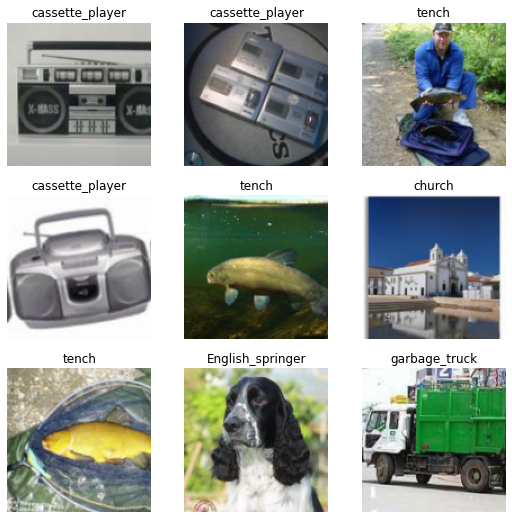

In [8]:
# führen Sie diese Zeile immer aus, wenn sie eine der vorherigen Zeilen verändert haben!

data = ImageDataLoaders.from_folder(
    path_to_data,
    train='train',
    valid='val',
    bs=batch_size,
    item_tfms=item_tfms,
    batch_tfms=batch_tfms,
)
data.show_batch()

## Netzwerkparameter

Nun können wir verschiedene Netzwerkarchitekturen ausprobieren. Größere Architekturen (meist kenntlich durch größere Zahlen, wie `resnet18` zu `resnet50`) haben zwar häufig bessere Kapazitäten, helfen auf kleinen Datensätzen nicht immer viel weiter und können auch deutlich langsamer im Training sein!


* `resnet`: Die ResNet Architekturen sind extrem weit verbreitet im modernen Deep Learning. Sie sind nicht immer das absolut beste Model, aber sind immer eine gute "erste Wahl".

* `alexnet`: Die AlexNet Architektur war die erste "echte" Deep Learning Architektur auf Bilddaten, die gut funktioniert hat. Heute ist sie ein bisschen veraltet.

* `densenet`: Densenets sind ziemlich große Netzwerke, die auf Resnets aufbauen.

* `squeezenet`: Squeezenets sind sehr kleine Netzwerke, die auch sehr schnell auf herkömmlichen Smartphones laufen.

In [9]:
# Hier sind Sie am Zug!

# resnets
# model = models.resnet18
#model = models.resnet50
# model = models.resnet101

# alexnet
model = models.alexnet

# densenets
# model = models.densenet121
# model = models.densenet161

# squeezenet
# model = models.squeezenet1_1

## Training

Jetzt sind wir soweit, dass wir unser Netzwerk trainieren können!

In [10]:
# Hier sind Sie am Zug!

# auf welche Weise soll trainiert werden?
# learning_type = 'basic'
learning_type = 'fine_tuning'

# lernrate
lr = 'suggested'
# lr = 0.001

# sollen wir ein vortrainiertes Netzwerk nehmen?
pretrained = True # oder: "= False"

# für wie viele Runden sollen wir trainieren?
epochs = 3

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


Empfohlene Lernrate ist 0.0120


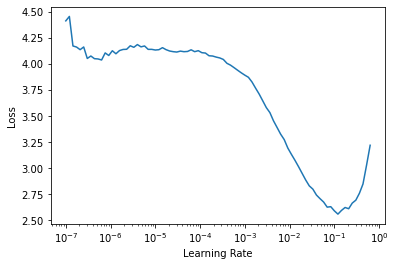

In [11]:
# führen Sie diese Zeile immer aus, wenn sie eine der vorherigen Zeilen verändert haben!

learner = cnn_learner(data, model, metrics=error_rate, pretrained=pretrained)
if lr == 'suggested':
    lr = learner.lr_find().lr_min
    print(f'Empfohlene Lernrate ist {lr:.4f}')

Jetzt sind wir wieder bereit zu trainieren!

**Für `imagenette` und `imagewoof` dauert das Training je nach Parameterwahl ca. 20-120 Sekunden pro Epoche, für `dogs_vs_cats` teilweise länger. Nutzen Sie diese Zeit effizient und überlegen Sie schon gemeinsam, welche Trainingsstrategie und -parameter Sie als nächstes ausprobieren wollen!**

epoch,train_loss,valid_loss,error_rate,time
0,0.734187,0.463020,0.140382,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.572102,0.389488,0.123312,00:26
1,0.400330,0.339374,0.106497,00:26
2,0.343171,0.323408,0.100637,00:25


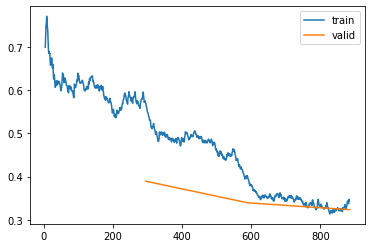

In [12]:
# führen Sie diese Zeile immer aus, wenn sie eine der vorherigen Zeilen verändert haben!

if learning_type == 'basic':
    learner.fit(epochs, lr=lr)
elif learning_type == 'fine_tuning':
    learner.fine_tune(freeze_epochs=1, epochs=epochs, lr=lr)
learner.recorder.plot_loss()

## Trainingsevaluation

Wir vergleichen unser Ergebnis zu einem einfachen, "uninformierten" Referenzalgorithmus (Baseline): "Was passiert, wenn man immer die häufigste Kategorie vorhersagt, ohne auf das Bild zu schauen?"

In [13]:
interp = ClassificationInterpretation.from_learner(learner)
preds = interp.preds.argmax(1)

baseline_error_rate = 1-np.unique(interp.targs, return_counts=True)[1].max() / len(interp.targs)
print(f'Fehlerrate für Referenzalgorithmus (baseline): {100*baseline_error_rate:.1f}%')

cnn_error_rate = (interp.targs != preds).float().mean()
print(f'Fehlerrate des Netzwerks: {100*cnn_error_rate:.1f}%')

Fehlerrate für Referenzalgorithmus (baseline): 89.3%
Fehlerrate des Netzwerks: 10.1%


Zum Schluß können wir uns noch anschauen, welche Bilder das Netzwerk falsch klassifiziert:

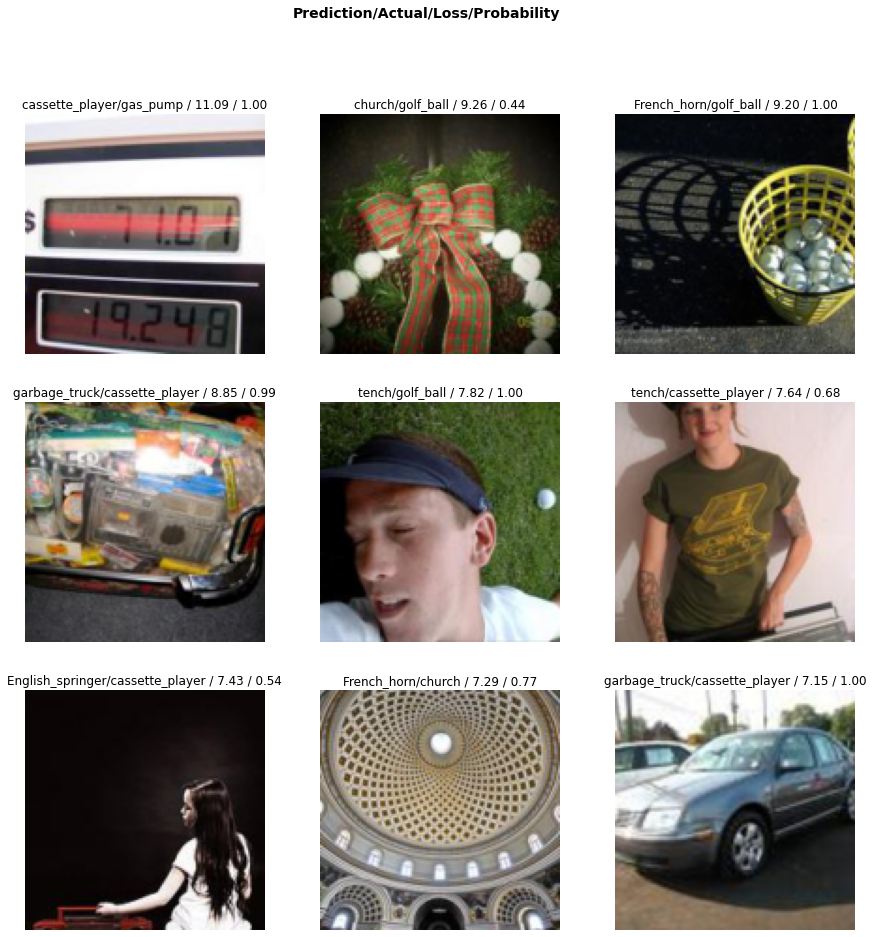

In [14]:
interp.plot_top_losses(9, figsize=(15,15))

## Iteration

Hervorragend, Sie haben Ihr erstes neuronales Netz traininert! Gehen Sie jetzt wieder zurück und verändern Sie andere Parameter, um herauszufinden, wie Sie die Leistung des Netzwerkes noch verbessern können.

Denken Sie daran, die Laufzeit neu zu starten, wenn Sie Probleme oder unerwartete Ergebnisse erhalten

In der Besprechung der Ergebnisse können Sie Ihre bestes Resultat dann teilen.